# Estatísticas de formatos de arquivo no censo de Diários Oficiais

Agora temos uma funcionalidade no site do [Censo](https://censo.ok.org.br/) que permite baixar os dados do mapeamento.
A partir desses dados, podemos encontrar analisar os formatos de arquivos que estão sendo utilizados nos diários oficiais e identificar oportunidades para maior aderência aos princípios de dados abertos.

Para reproduzir esse notebook:
1. Acesse a página do [andamento do censo](https://censo.ok.org.br/andamento/#view) e faça o download dos dados
2. Coloque o arquivo na pasta `notebooks/`

In [ ]:
# importa bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# carrega arquivo
df = pd.read_csv('base_mapeamento.csv', sep=',')

In [838]:
df.head()

,municipio,IBGE,IBGE7,UF,regiao,populacao_2020,eh_capital,fonte_1,fonte_2,fonte_3,fonte_4,is_online,data_inicial,tipo_arquivo,validacao,navegacao,observacoes
0,Abaetetuba (PA),150010,1500107,PA,Região Norte,159080,False,http://www.diariomunicipal.com.br/famep/pesqui...,None,None,None,1,2016-06-30,HTML,True,None,NaN
1,Abreu e Lima (PE),260005,2600054,PE,Região Nordeste,100346,False,http://www.diariomunicipal.com.br/amupe/,None,None,None,1,None,PDF texto,True,None,O Diário Oficial do município de Abreu e Lima ...
2,Alagoinhas (BA),290070,2900702,BA,Região Nordeste,152327,False,https://doem.org.br/ba/alagoinhas,None,None,None,1,2015-01-28,PDF texto,True,None,None
3,Almirante Tamandaré (PR),410040,4100400,PR,Região Sul,120041,False,http://www.diariomunicipal.com.br/amp/pesquisa...,None,None,None,1,2014-01-08,HTML,True,None,NaN
4,Altamira (PA),150060,1500602,PA,Região Norte,115969,False,http://altamira.pa.gov.br/site/download-catego...,None,None,None,1,2013-05-11,PDF imagem,True,None,NaN


## Análise preliminar

- Verifica-se que o dataframe possui registros de 326 municípios com mais de 100.000 habitantes, utilizando 4 formatos de arquivo principais em seus diários oficiais: PDF texto, HTML, PDF imagem e DOCX.
- Além desses, há 2 registros sem formato identificado ("None") (municípios de Rio Grande - RS e Viamão - RS) e 5 sob a categoria "Outro formato" (Lagarto - SE e Poá -SP, que disponibilizam seus D.O. em formatos de imagem; São Pedro da Aldeia - RJ, sem mais informações sobre formato; e Tatuí - SP e Tubarão - SC, que disponibilizam seus D.O. em vários formatos, a depender do acesso).
- O formato mais utilizado é o PDF texto, seguido por HTML. Tal constatação é positiva, pois esses são formatos abertos e mais aderentes aos princípios de dados abertos que PDF imagem (que dificulta a localização e extração de dados) e DOCX (que é um formato proprietário da Microsoft).

In [803]:
df["tipo_arquivo"].describe()

count           326
unique            6
top       PDF texto
freq            223
Name: tipo_arquivo, dtype: object

In [804]:
df["tipo_arquivo"].value_counts()

PDF texto        223
HTML              56
PDF imagem        39
Outro formato      5
None               2
DOCX               1
Name: tipo_arquivo, dtype: int64

In [805]:
df[df["tipo_arquivo"]=="None"]

,municipio,IBGE,IBGE7,UF,regiao,populacao_2020,eh_capital,fonte_1,fonte_2,fonte_3,fonte_4,is_online,data_inicial,tipo_arquivo,validacao,navegacao,observacoes
242,Rio Grande (RS),431560,4315602,RS,Região Sul,211965,False,https://www.in.gov.br/consulta/-/buscar/dou?q=...,None,None,None,3,None,None,True,None,Não encontrado veículo de publicação oficial n...
315,Viamão (RS),432300,4323002,RS,Região Sul,256302,False,https://www.in.gov.br/consulta/-/buscar/dou?q=...,None,None,None,3,None,None,True,None,Endereço existe (https://www.viamao.rs.gov.br/...


In [806]:
df.shape

(326, 17)

In [807]:
# Exclui do dataframe os municípios sem informação de formato
df = df[df['tipo_arquivo'] != "None"]

In [839]:
# Verifica-se que os dois registros sem indicação de formato foram retirados
df.shape

(326, 17)

In [854]:
# Municípios que disponibilizam o diário oficial em "Outro formato"
pd.options.display.max_colwidth = 1000
df[df['tipo_arquivo'] == 'Outro formato'][['municipio','observacoes']]

,municipio,observacoes
160,Lagarto (SE),O ambiente aberto permite visualizar apenas como imagem.
229,Poá (SP),Imagem (jpg)
289,São Pedro da Aldeia (RJ),NaN
294,Tatuí (SP),"Só existem 2 diários oficiais disponíveis no site como publicações (15 e 22 fev. 2019), no entanto a página reúne todas as publicações oficiais do munícipio e cada uma delas está disponível em um formato de arquivo diferente, por exemplo: as execuções orçamentárias estão em .xls, os editais de pregões em .docx e a legislação em .pdf\r\n\r\nA data de início é a data do ato oficial mais antigo encontrado, após buscas nas seções ""Editais de chamamento"", ""Leis municipais"", ""Decretos municipais"" e ""Audiências públicas"" (ver anomalia). Foram desconsideradas datas anteriores das seções ""Contas Públicas"" e ""Leis orçamentárias"", que contém arquivos de anos anteriores, mas sem os respectivos atos publicados. \r\n\r\nEmbora haja editais de chamamento e avisos de audiência pública desde 2010/2011, as seções de leis e decretos parecem conter atos só a partir de 2015."
304,Tubarão (SC),"O formato do arquivo depende do tipo de ato, por exemplo os Decretos estão em .odt e os pregões em .pdf"


## Análise nacional: formatos, municípios e população.
- Olhando o país como um todo, verifica-se que quase 70% dos municípios disponibilizam seus D.O. no formato PDF texto. Esses municípios atendem a quase 80% da população do país, o que indica que os municípios mais populosos dão preferência a esse formato.
- Esse fenômeno se inverte para os outros formatos (a participações é maior em termos de números de municípios do que de população atendida). Isso indica que os outros formatos são mais utilizados por municípios de menor população.

In [833]:
# Percentual de municípios utilizando cada formato
df_m = df.groupby(["tipo_arquivo"])["municipio"].nunique()
num_municipios = df['municipio'].nunique()
df_m_perc = df_m/num_municipios

# Percentual da população com acesso a cada formato
df_p = df.groupby(["tipo_arquivo"])["populacao_2020"].sum()
pop_total = df['populacao_2020'].sum()
df_p_perc = df_p/pop_total

# Percentuais de municípios e da população com acesso em cada formato
df_m_perc = df_m_perc.reset_index()
df_p_perc = df_p_perc.reset_index()
df_m_p_perc = df_m_perc.merge(df_p_perc, on="tipo_arquivo")
df_m_p_perc.style.format({
    'municipio': '{:.2%}'.format,
    'populacao_2020': '{:.2%}'.format,
})

,tipo_arquivo,municipio,populacao_2020
0,DOCX,0.31%,0.11%
1,HTML,17.28%,9.97%
2,Outro formato,1.54%,0.46%
3,PDF imagem,12.04%,10.93%
4,PDF texto,68.83%,78.53%


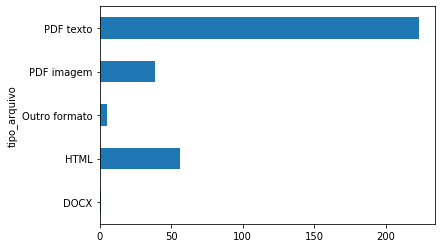

In [835]:
# Visualização da quantidade de municípios utilizando cada formato
df_m.plot.barh()

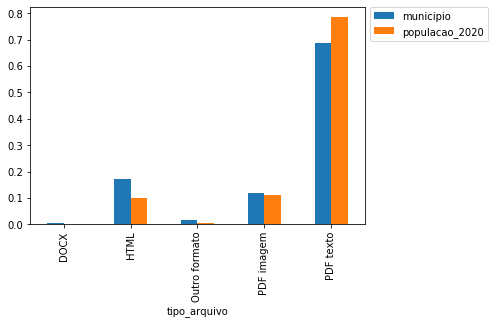

In [832]:
# Visualização da parcela de municípios e da população com acesso em cada formato
df_m_p_perc.plot.bar(x="tipo_arquivo")
plt.legend(bbox_to_anchor=(1, 1.02))
plt.show()

## Análise regional
- Verifica-se que a Região Sudeste é aquela que mais oferta D.O. no formato PDF texto sob todos os critérios medidos: em termos absolutos, de percentual de municípios e de percentual da população atendida.
- Tendo em conta as desvantagens do formato PDF imagem (dificuldade para encontrar e extrair informações), o destaque negativo fica para a Região Nordeste, que possui o maior percentual de municípios e da população atendida nesse formato.

In [811]:
# Número de municípios utilizando cada formato, por região
df_r = df.groupby(["regiao","tipo_arquivo"])["municipio"].nunique()
df_r = df_r.reset_index().pivot('regiao', 'tipo_arquivo', 'municipio')
df_r = df_r.fillna(0).astype(int)
df_r

tipo_arquivo,DOCX,HTML,Outro formato,PDF imagem,PDF texto
regiao,,,,,
Região Centro-Oeste,0,5,0,3,16
Região Nordeste,0,9,1,12,42
Região Norte,0,11,0,4,16
Região Sudeste,0,14,3,18,119
Região Sul,1,17,1,2,30


In [812]:
# Percentual de municípios utilizando cada formato, por região
df_r_perc = df_r.apply(lambda x: x/x.sum(), axis=1)
df_r_perc.style.format({
    'DOCX': '{:.2%}'.format,
    'HTML': '{:.2%}'.format,
    'Outro formato': '{:.2%}'.format,
    'PDF imagem': '{:.2%}'.format,
    'PDF texto': '{:.2%}'.format,
})

tipo_arquivo,DOCX,HTML,Outro formato,PDF imagem,PDF texto
regiao,,,,,
Região Centro-Oeste,0.00%,20.83%,0.00%,12.50%,66.67%
Região Nordeste,0.00%,14.06%,1.56%,18.75%,65.62%
Região Norte,0.00%,35.48%,0.00%,12.90%,51.61%
Região Sudeste,0.00%,9.09%,1.95%,11.69%,77.27%
Região Sul,1.96%,33.33%,1.96%,3.92%,58.82%


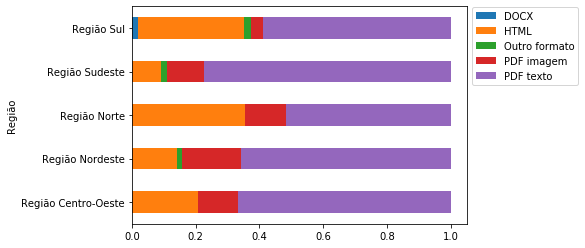

In [813]:
# Visualização da parcela de municípios utilizando cada formato, por região
ax = df_r_perc.plot.barh(stacked=True)
plt.legend(bbox_to_anchor=(1, 1.02))
ax.set_ylabel("Região")
plt.show()

In [814]:
# População com acesso a cada formato, por região
df_r_p = df.groupby(["regiao","tipo_arquivo"])["populacao_2020"].sum()
df_r_p = df_r_p.reset_index().pivot('regiao', 'tipo_arquivo', 'populacao_2020')
df_r_p = df_r_p.fillna(0).astype(int)
# Percentual da população com acesso a cada formato, por região
df_r_p_perc = df_r_p.apply(lambda x: x/x.sum(), axis=1)
df_r_p_perc.style.format({
    'DOCX': '{:.2%}'.format,
    'HTML': '{:.2%}'.format,
    'Outro formato': '{:.2%}'.format,
    'PDF imagem': '{:.2%}'.format,
    'PDF texto': '{:.2%}'.format,
})

tipo_arquivo,DOCX,HTML,Outro formato,PDF imagem,PDF texto
regiao,,,,,
Região Centro-Oeste,0.00%,12.62%,0.00%,11.92%,75.46%
Região Nordeste,0.00%,7.82%,0.44%,28.21%,63.53%
Região Norte,0.00%,17.43%,0.00%,9.00%,73.57%
Região Sudeste,0.00%,6.02%,0.55%,6.34%,87.09%
Região Sul,0.94%,23.86%,0.73%,2.99%,71.48%


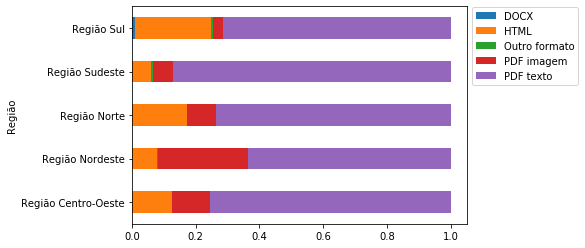

In [857]:
# Visualização da parcela da população com acesso a cada formato, por região
ax = df_r_p_perc.plot.barh(stacked=True)
plt.legend(bbox_to_anchor=(1, 1.02))
ax.set_ylabel("Região")
plt.show()

## Análise por UF
- Nesta seção, o destaque positivo fica para o Distrito Federal e para o Tocantins, que disponibilizam 100% de seus D.O. no formato PDF texto.
- No extremo oposto, destaca-se o estado do Amapá, que disponibiliza 100% dos D.O. da amostra no formato PDF imagem.

In [828]:
# Número de municípios utilizando cada formato, por UF
df_uf = df.groupby(["UF", "tipo_arquivo"])["municipio"].nunique()
df_uf = df_uf.reset_index().pivot('UF', 'tipo_arquivo', 'municipio')
df_uf = df_uf.fillna(0).astype(int)
# Percentual de municípios utilizando cada formato, por UF
df_uf_perc = df_uf.apply(lambda x: x/x.sum(), axis=1)
df_uf_perc.head().style.format({
    'DOCX': '{:.2%}'.format,
    'HTML': '{:.2%}'.format,
    'Outro formato': '{:.2%}'.format,
    'PDF imagem': '{:.2%}'.format,
    'PDF texto': '{:.2%}'.format,
    })

tipo_arquivo,DOCX,HTML,Outro formato,PDF imagem,PDF texto
UF,,,,,
AC,0.00%,0.00%,0.00%,0.00%,100.00%
AL,0.00%,0.00%,0.00%,0.00%,100.00%
AM,0.00%,66.67%,0.00%,0.00%,33.33%
AP,0.00%,0.00%,0.00%,100.00%,0.00%
BA,0.00%,0.00%,0.00%,47.06%,52.94%


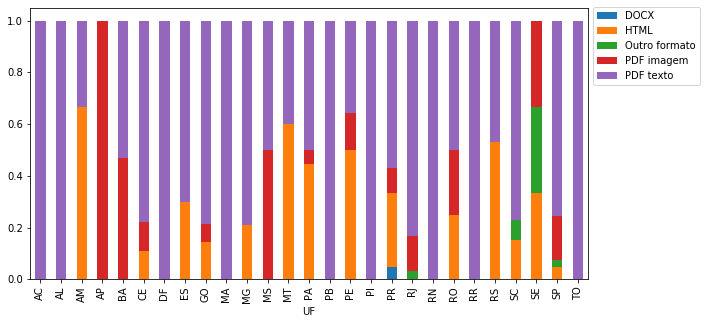

In [818]:
# Visualização da parcela de municípios utilizando cada formato, por UF
df_uf_perc.plot.bar(stacked=True, figsize=(10,5))
plt.legend(bbox_to_anchor=(1, 1.02))
plt.show()

In [829]:
# População com acesso a cada formato, por UF
df_uf_p = df.groupby(["UF", "tipo_arquivo"])["populacao_2020"].sum()
df_uf_p = df_uf_p.reset_index().pivot('UF', 'tipo_arquivo', 'populacao_2020')
df_uf_p = df_uf_p.fillna(0).astype(int)
# Percentual da população com acesso a cada formato, por região
df_uf_p_perc = df_uf_p.apply(lambda x: x/x.sum(), axis=1)
df_uf_p_perc.head().style.format({
    'DOCX': '{:.2%}'.format,
    'HTML': '{:.2%}'.format,
    'Outro formato': '{:.2%}'.format,
    'PDF imagem': '{:.2%}'.format,
    'PDF texto': '{:.2%}'.format,
})

tipo_arquivo,DOCX,HTML,Outro formato,PDF imagem,PDF texto
UF,,,,,
AC,0.00%,0.00%,0.00%,0.00%,100.00%
AL,0.00%,0.00%,0.00%,0.00%,100.00%
AM,0.00%,8.95%,0.00%,0.00%,91.05%
AP,0.00%,0.00%,0.00%,100.00%,0.00%
BA,0.00%,0.00%,0.00%,26.63%,73.37%


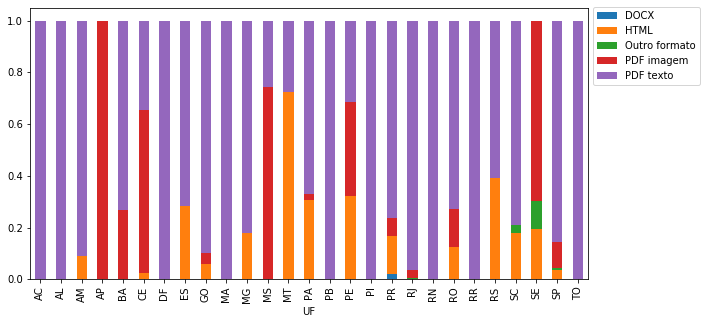

In [820]:
# Visualização da parcela da população com acesso a cada formato, por UF
df_uf_p_perc.plot.bar(stacked=True, figsize=(10,5))
plt.legend(bbox_to_anchor=(1, 1.02))
plt.show()